******************** Train Data read ********************
     LOC_BLANK  LOC_CODE_AND_COMMENT  HALSTEAD_CONTENT  \
0           25                     7             32.11   
1            7                     2             13.09   
2           20                     8             99.14   
3            0                     0             16.35   
4            3                     0             22.46   
..         ...                   ...               ...   
732         16                     5             38.45   
733         36                    11             32.58   
734          9                     0             52.01   
735          4                     0             24.30   
736          1                     0             26.30   

     NORMALIZED_CYLOMATIC_COMPLEXITY  NUM_OPERANDS  NUM_UNIQUE_OPERANDS  \
0                               0.08            44                   23   
1                               0.29            24                    9   
2                   

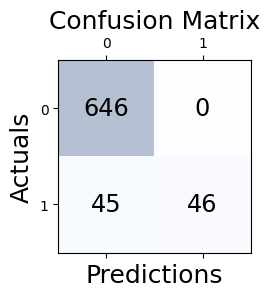

precision is: 1.0
Recall is: 0.5054945054945055
1.0
Specificity is: 1.0
PNV is: 0.934876989869754
Area under curve(AUC): 0.95
              precision    recall  f1-score   support

           N       0.93      1.00      0.97       646
           Y       1.00      0.51      0.67        91

    accuracy                           0.94       737
   macro avg       0.97      0.75      0.82       737
weighted avg       0.94      0.94      0.93       737

Traininng Accuracy is 93.89
Misclassification Rate is:6.11
1.0
False Positive Ratio is:  0.0
False Negative Ratio is:  0.4945054945054945
Execution Time: 5.749176200013608


In [15]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import timeit

code_to_measure = '''

#-----------Fetching train data from root directory---------------#

dataset_url = "./PC3_FS_TrainData.csv"
train_data = pd.read_csv(dataset_url)
print("*" * 20 + ' Train Data read ' + "*" * 20)
print(train_data)



#X_train has training
X_train=train_data.drop(columns='Defective')
print(X_train)


#Y_train has train class lables 
Y_train = train_data["Defective"]
print(Y_train)


#---------------applying voting ensemble---------------------#

voting_classifiers=[
    ['RF:',RandomForestClassifier(criterion="gini",max_depth=10,n_estimators=500,max_features=None,random_state=0)],
    ['SVM:',svm.SVC(kernel='poly', C=2,probability=True,random_state=0)],
    ['NBG:',GaussianNB()]]
    
clf=VotingClassifier(estimators=voting_classifiers, voting='soft',verbose=1,)
print(clf.get_params())

#----------------training model--------------------------#

clf=clf.fit(X_train,Y_train)

#----------------get training predictios-----------------#

training_predictions= clf.predict(X_train)
#print(training_predictions);

#-----------------generate training confusion matrix--------#

confusion_matrix(Y_train,training_predictions,labels = ['N','Y'])

#----------------draw training confusion matrix--------------#

conf_matrix = confusion_matrix(Y_train,training_predictions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#-----------------get evaluation matrix of training data------------------#

#precision
precision = precision_score(Y_train,training_predictions,pos_label='Y')
print ("precision is: " + str(precision))


#recall
recall = recall_score(Y_train,training_predictions,pos_label='Y')
print ("Recall is: " + str(recall))


#specificity https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn
specificity = recall_score(Y_train,training_predictions,pos_label='N')
print (specificity)
print ("Specificity is: " + str(specificity))

#PNV predicted negative values_https://stackoverflow.com/questions/55622544/generate-negative-predictive-value-using-cross-val-score-in-sklearn-for-model-pe
PNV = precision_score(Y_train,training_predictions,pos_label='N')
print ("PNV is: " + str(PNV))

# predict probabilities
pred_prob = clf.predict_proba(X_train)[::,1]
#print(pred_prob)

# auc scores
auc = metrics.roc_auc_score(Y_train, pred_prob)
print("Area under curve(AUC): " + str(round(auc,2)))

f_measure=f1_score(Y_train, training_predictions,pos_label='Y')

print(classification_report(Y_train,training_predictions))

#--------------------get training accuracy-------------------#

tarining_accuracy=clf.score(X_train, Y_train)
#print(tarining_accuracy*100)
print("Traininng Accuracy is " +str(round(tarining_accuracy*100,2)));

#---------------Misclassification rate----------------------#
misclassification_rate = 1-tarining_accuracy
print ("Misclassification Rate is:" +str(round(misclassification_rate*100,2)));

#----------------False positive ratio----------------------#
print (specificity)
False_positive_Ratio = 1-specificity

print ("False Positive Ratio is: ", + False_positive_Ratio)

#----------------False negative ratio--------------------#
False_negative_ratio = 1-recall
print ("False Negative Ratio is: ", + False_negative_ratio)

'''

# Measure the execution time
exec_time = timeit.timeit(stmt=lambda: exec(code_to_measure), number=1)

# Print the execution time
print("Execution Time:", exec_time)


